<a href="https://colab.research.google.com/github/CansecoSergio/python-data-science/blob/main/M7%20Sergio%20Canseco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Reto Módulo 7 Sergio Canseco***

### **Importación de los paquetes**



In [111]:
from sklearn import cluster, metrics
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [112]:
train = pd.read_csv('/content/drive/MyDrive/Archivos Collab/M7/Train.csv')
train.head()
#Attrition_rate

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [113]:
#Dado que el id del empleado no es relevante para la evaluación a nuvel grupo, se elimina
train = train.drop(['Employee_ID'], axis=1)

In [114]:
train.dtypes

Gender                        object
Age                          float64
Education_Level                int64
Relationship_Status           object
Hometown                      object
Unit                          object
Decision_skill_possess        object
Time_of_service              float64
Time_since_promotion           int64
growth_rate                    int64
Travel_Rate                    int64
Post_Level                     int64
Pay_Scale                    float64
Compensation_and_Benefits     object
Work_Life_balance            float64
VAR1                           int64
VAR2                         float64
VAR3                         float64
VAR4                         float64
VAR5                           int64
VAR6                           int64
VAR7                           int64
Attrition_rate               float64
dtype: object

In [115]:
train.nunique()

Gender                          2
Age                            47
Education_Level                 5
Relationship_Status             2
Hometown                        5
Unit                           12
Decision_skill_possess          4
Time_of_service                44
Time_since_promotion            5
growth_rate                    55
Travel_Rate                     3
Post_Level                      5
Pay_Scale                      10
Compensation_and_Benefits       5
Work_Life_balance               5
VAR1                            5
VAR2                            5
VAR3                            5
VAR4                            3
VAR5                            5
VAR6                            5
VAR7                            5
Attrition_rate               3317
dtype: int64

In [116]:
train.isna().sum()

Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [117]:
train.shape

(7000, 23)

In [118]:
#Se realiza una copia del dataframe
train_c = train.copy()
train_c.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


### **Tratamiento de valores faltantes**

In [119]:
train_c.isna().sum()

Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [120]:
#Se imputan los valores faltantes a la columna Age
#Ya que son valores enteros y no hay edades representadas con decimales en la muestra se utiliza la mediana
train_c['Age'].fillna(train_c['Age'].median(), inplace=True)

In [121]:
#Se imputan los valores faltantes a la columna Time_of_service
#Ya que son valores enteros y no hay valores representados con decimales en la muestra se utiliza la mediana
train_c['Time_of_service'].fillna(train_c['Time_of_service'].median(), inplace=True)

In [122]:
#Se imputan los valores faltantes a la columna Pay_Scale
#Ya que son valores enteros y estan en un rango se utiliza la mediana
train_c['Pay_Scale'].fillna(train_c['Pay_Scale'].median(), inplace=True)

In [123]:
#Se imputan los valores faltantes a la columna Work_Life_balance
#Ya que son valores enteros y estan en un rango se utiliza la mediana
train_c['Work_Life_balance'].fillna(train_c['Work_Life_balance'].median(), inplace=True)

In [124]:
#Se imputan los valores faltantes a la columna VAR2
#Ya que son valores enteros y estan en un rango se utiliza la mediana
train_c['VAR2'].fillna(train_c['VAR2'].mean(), inplace=True)

In [125]:
#Se imputan los valores faltantes a la columna VAR4
#Ya que son valores enteros y estan en un rango se utiliza la mediana
train_c['VAR4'].fillna(train_c['VAR4'].median(), inplace=True)

In [126]:
train_c.isna().sum()

Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
Attrition_rate               0
dtype: int64

In [127]:
train_c.tail()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
6995,F,23.0,5,Married,Franklin,Operarions,Behavioral,4.0,1,20,...,type3,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.7839
6996,F,44.0,1,Married,Lebanon,R&D,Analytical,16.0,2,59,...,type3,3.0,2,-0.1048,-2.7762,2.0,4,8,4,0.1055
6997,F,49.0,3,Single,Springfield,IT,Directive,10.0,1,59,...,type2,4.0,2,-0.1048,-0.4537,2.0,4,8,3,0.7847
6998,F,47.0,3,Married,Washington,Sales,Behavioral,24.0,1,21,...,type0,2.0,4,0.7516,1.8688,2.0,3,6,3,0.4162
6999,F,58.0,3,Married,Franklin,IT,Directive,22.0,2,74,...,type2,3.0,3,-0.1048,-1.6150,3.0,4,5,3,0.0910


In [128]:
train_c

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,...,type2,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0.0668
4,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,F,23.0,5,Married,Franklin,Operarions,Behavioral,4.0,1,20,...,type3,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.7839
6996,F,44.0,1,Married,Lebanon,R&D,Analytical,16.0,2,59,...,type3,3.0,2,-0.1048,-2.7762,2.0,4,8,4,0.1055
6997,F,49.0,3,Single,Springfield,IT,Directive,10.0,1,59,...,type2,4.0,2,-0.1048,-0.4537,2.0,4,8,3,0.7847
6998,F,47.0,3,Married,Washington,Sales,Behavioral,24.0,1,21,...,type0,2.0,4,0.7516,1.8688,2.0,3,6,3,0.4162


In [129]:
for col in train_c.columns:
    if train_c[col].dtype == 'object':
        train_c[col] = OrdinalEncoder().fit_transform(train_c[[col]])

In [130]:
train_c

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,0.0,42.0,4,0.0,1.0,2.0,2.0,4.0,4,33,...,2.0,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,1.0,24.0,3,1.0,3.0,3.0,0.0,5.0,4,36,...,2.0,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,0.0,58.0,3,0.0,0.0,8.0,2.0,27.0,3,51,...,2.0,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,0.0,26.0,3,1.0,2.0,1.0,1.0,4.0,3,56,...,2.0,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0.0668
4,0.0,31.0,1,0.0,3.0,3.0,2.0,5.0,4,62,...,3.0,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0.0,23.0,5,0.0,1.0,5.0,1.0,4.0,1,20,...,3.0,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.7839
6996,0.0,44.0,1,0.0,2.0,9.0,0.0,16.0,2,59,...,3.0,3.0,2,-0.1048,-2.7762,2.0,4,8,4,0.1055
6997,0.0,49.0,3,1.0,3.0,2.0,3.0,10.0,1,59,...,2.0,4.0,2,-0.1048,-0.4537,2.0,4,8,3,0.7847
6998,0.0,47.0,3,0.0,4.0,10.0,1.0,24.0,1,21,...,0.0,2.0,4,0.7516,1.8688,2.0,3,6,3,0.4162


In [131]:
train_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     7000 non-null   float64
 1   Age                        7000 non-null   float64
 2   Education_Level            7000 non-null   int64  
 3   Relationship_Status        7000 non-null   float64
 4   Hometown                   7000 non-null   float64
 5   Unit                       7000 non-null   float64
 6   Decision_skill_possess     7000 non-null   float64
 7   Time_of_service            7000 non-null   float64
 8   Time_since_promotion       7000 non-null   int64  
 9   growth_rate                7000 non-null   int64  
 10  Travel_Rate                7000 non-null   int64  
 11  Post_Level                 7000 non-null   int64  
 12  Pay_Scale                  7000 non-null   float64
 13  Compensation_and_Benefits  7000 non-null   float

<Axes: >

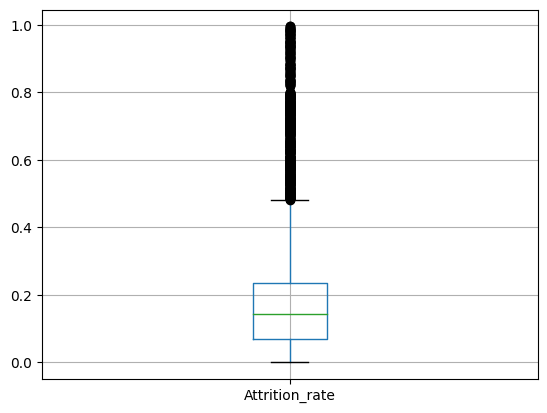

In [132]:
boxplot = train_c.boxplot(column='Attrition_rate')
boxplot

In [133]:
X_train = train_c.to_numpy()
print(X_train)

[[ 0.     42.      4.     ...  5.      3.      0.1841]
 [ 1.     24.      3.     ...  5.      3.      0.067 ]
 [ 0.     58.      3.     ...  8.      3.      0.0851]
 ...
 [ 0.     49.      3.     ...  8.      3.      0.7847]
 [ 0.     47.      3.     ...  6.      3.      0.4162]
 [ 0.     58.      3.     ...  5.      3.      0.091 ]]


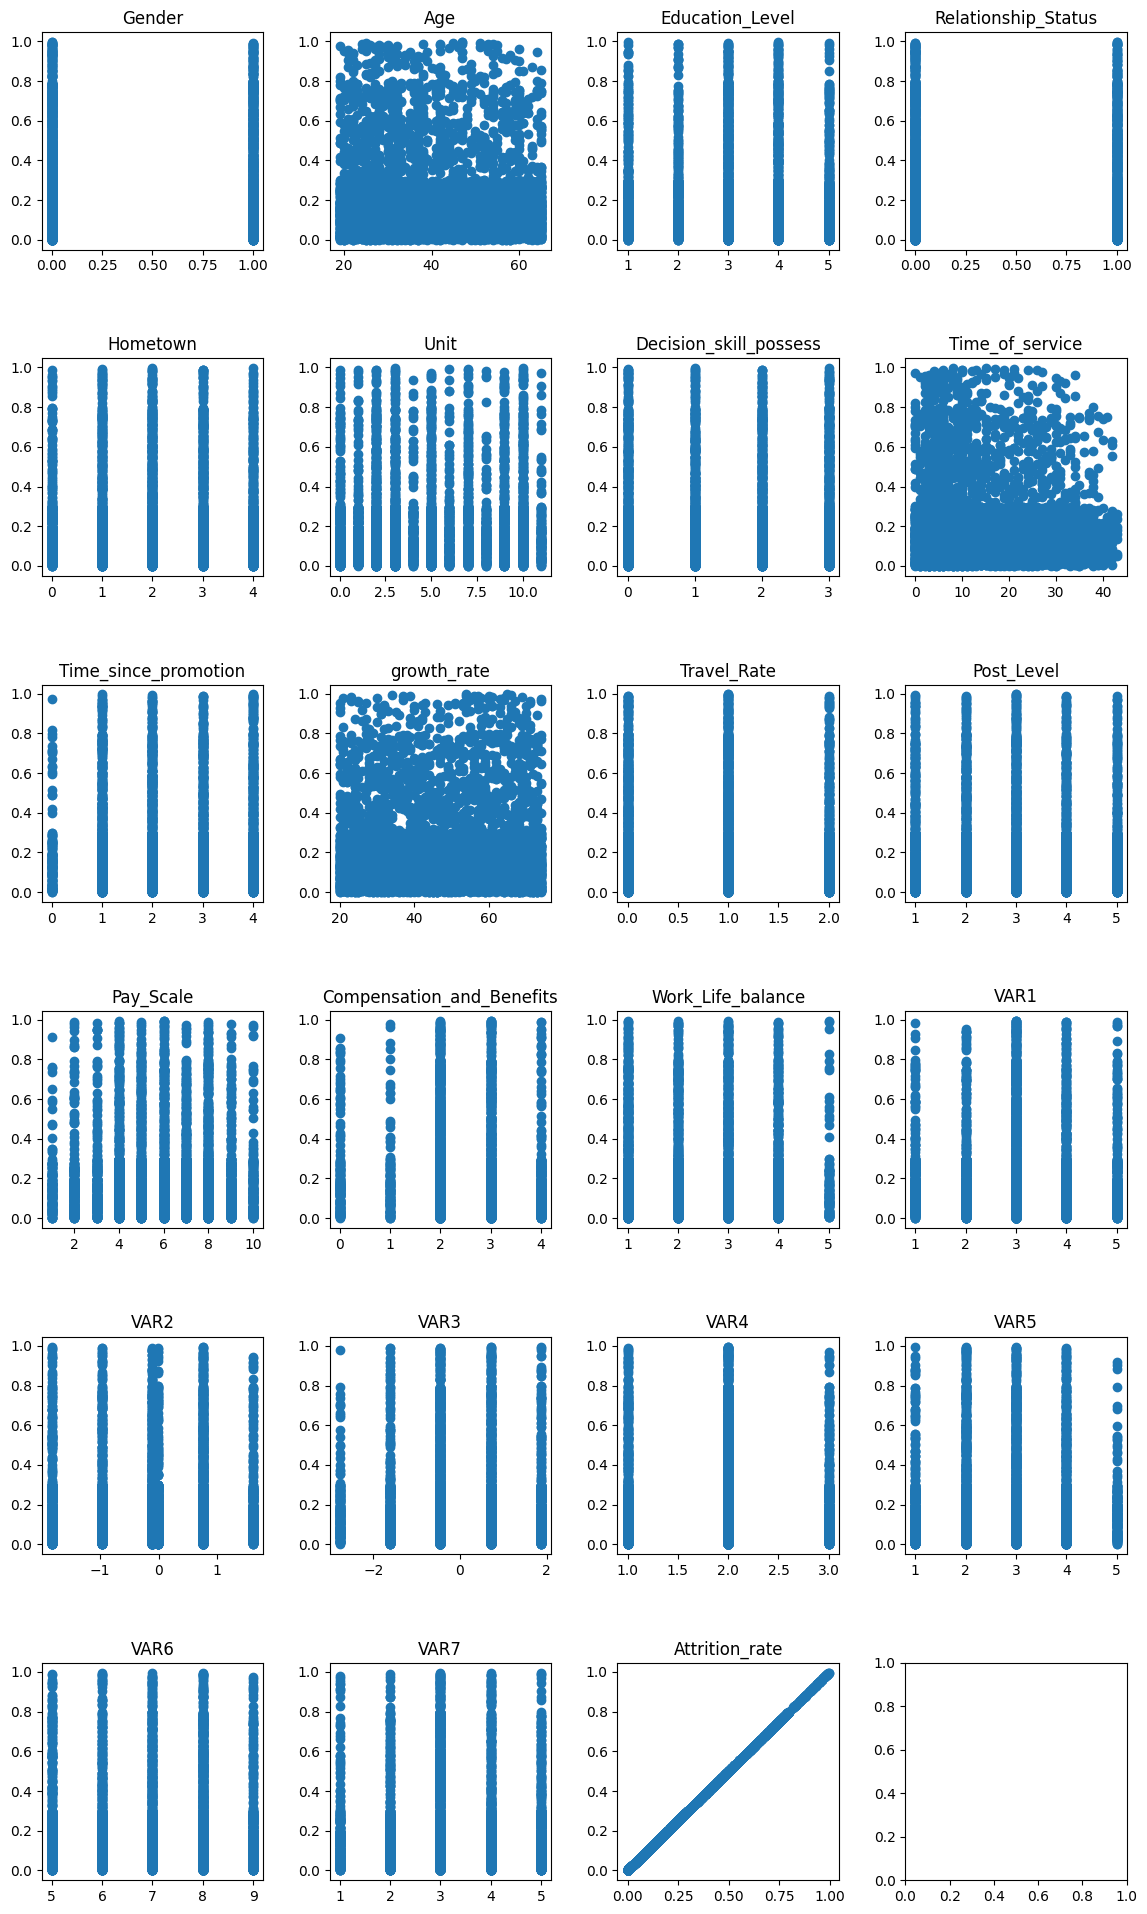

In [134]:
#Correlacion de variables a la taza de deserción
v = 0
fig, axs = plt.subplots(6, 4, figsize=(14, 24))
for i in range(6):
  for j in range(4):
    if(v < 23):
      axs[i,j].scatter(X_train[:,v], X_train[:,22])
      axs[i,j].set_title(train_c.columns[v])
    v+=1
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [135]:
X = StandardScaler().fit_transform(X_train)

In [136]:
X

array([[-0.83756018,  0.19158484,  0.76255659, ..., -1.80495079,
        -0.27776175, -0.02840599],
       [ 1.19394406, -1.17062324, -0.17638732, ..., -1.80495079,
        -0.27776175, -0.65885713],
       [-0.83756018,  1.40243646, -0.17638732, ...,  0.77197263,
        -0.27776175, -0.56140908],
       ...,
       [-0.83756018,  0.72133242, -0.17638732, ...,  0.77197263,
        -0.27776175,  3.20514613],
       [-0.83756018,  0.56997597, -0.17638732, ..., -0.94597631,
        -0.27776175,  1.22119016],
       [-0.83756018,  1.40243646, -0.17638732, ..., -1.80495079,
        -0.27776175, -0.52964425]])

In [137]:
np.random.seed(42)

In [138]:
nc = 10

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

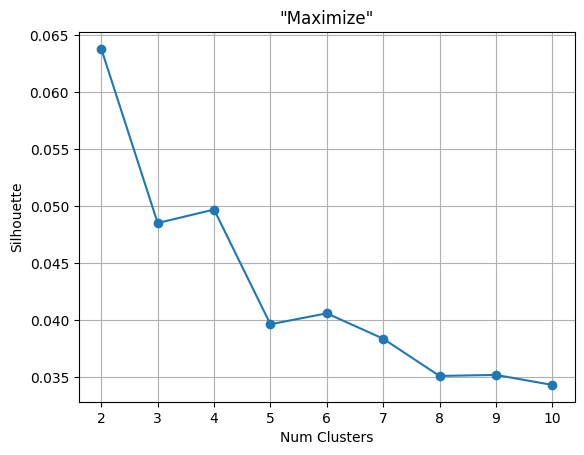

In [139]:
results = {}
for k in range(2, nc+1):
  k_means = cluster.KMeans(n_clusters=k).fit(X)
  y_pred = k_means.predict(X)
  results[k] = metrics.silhouette_score(X, y_pred)

clusters_counts = list(results.keys())
index_values = list(results.values())

plt.plot(clusters_counts, index_values, 'o-')
plt.grid(True)
plt.title('"Maximize"')
plt.xlabel('Num Clusters')
plt.xticks(clusters_counts)
plt.ylabel('Silhouette')
plt.show()

In [140]:
k = 4  # Debido a la grafica
k_means = cluster.KMeans(n_clusters=k).fit(X)
y_pred = k_means.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [141]:
y_pred

array([2, 1, 3, ..., 0, 3, 3], dtype=int32)

In [142]:
train['groups'] = y_pred

In [143]:
train

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,groups
0,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,...,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841,2
1,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,...,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670,1
2,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,...,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851,3
3,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,...,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668,1
4,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,...,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,F,23.0,5,Married,Franklin,Operarions,Behavioral,4.0,1,20,...,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.7839,0
6996,F,44.0,1,Married,Lebanon,R&D,Analytical,16.0,2,59,...,3.0,2,-0.1048,-2.7762,2.0,4,8,4,0.1055,2
6997,F,49.0,3,Single,Springfield,IT,Directive,10.0,1,59,...,4.0,2,-0.1048,-0.4537,2.0,4,8,3,0.7847,0
6998,F,47.0,3,Married,Washington,Sales,Behavioral,24.0,1,21,...,2.0,4,0.7516,1.8688,2.0,3,6,3,0.4162,3


In [144]:
train

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,groups
0,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,...,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841,2
1,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,...,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670,1
2,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,...,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851,3
3,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,...,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668,1
4,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,...,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,F,23.0,5,Married,Franklin,Operarions,Behavioral,4.0,1,20,...,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.7839,0
6996,F,44.0,1,Married,Lebanon,R&D,Analytical,16.0,2,59,...,3.0,2,-0.1048,-2.7762,2.0,4,8,4,0.1055,2
6997,F,49.0,3,Single,Springfield,IT,Directive,10.0,1,59,...,4.0,2,-0.1048,-0.4537,2.0,4,8,3,0.7847,0
6998,F,47.0,3,Married,Washington,Sales,Behavioral,24.0,1,21,...,2.0,4,0.7516,1.8688,2.0,3,6,3,0.4162,3


In [145]:
#Se realiza la segmentación
trains = []  # Segmentos
for g in range(k):
  trains.append(train[train['groups']==g])

In [146]:
for g in range(k):
    print('Group'+str(g),'has',len(trains[g]),'employees.')

Group0 has 585 employees.
Group1 has 1670 employees.
Group2 has 2699 employees.
Group3 has 2046 employees.


In [147]:
grouped = pd.DataFrame()
grouped['Features'] = train.columns[:-1] #Se ignora la columa de grupos
for g in range(k):
    arr = []
    for col in grouped['Features']:
        if trains[g][col].dtype != 'object':
            arr.append(np.round(trains[g][col].mean(),2))
        else:
            arr.append(trains[g][col].value_counts().keys()[0])
    grouped['Group'+str(g)] = arr
grouped

,Features,Group0,Group1,Group2,Group3
0,Gender,F,F,F,F
1,Age,38.07,32.93,31.23,55.88
2,Education_Level,3.16,3.19,3.2,3.17
3,Relationship_Status,Married,Single,Married,Married
4,Hometown,Lebanon,Lebanon,Lebanon,Lebanon
5,Unit,IT,IT,IT,IT
6,Decision_skill_possess,Directive,Analytical,Analytical,Directive
7,Time_of_service,11.9,8.1,7.01,26.34
8,Time_since_promotion,2.42,2.28,2.28,2.53
9,growth_rate,47.95,47.03,47.01,46.91


### **Con base a la información se puede concluir que:**

**El grupo 0**: Son los empleados que existe menor probabilidad de deserción y corresponden a en su mayoría puestos Directivos de TI de en promedio 38 años de edad.

**El grupo 1 y 2**: Son aquellos empleados que tienen alta probabilidad de deserción, el grupo 1 es de solteros y el 2 corresponde a los casados y ambos corresponden a en su mayoría puestos de Analistas de TI con 31 o 32 años de edad en promedio

**El grupo 3**: Son los empleados que existe mayor probabilidad de deserción y corresponden a en su mayoría puestos Directivos de TI con personas de en promedio 55 años de edad. Este grupo tiene generalmente más tiempo de servicio.